In [5]:
import matplotlib.pyplot as plt
import os
from glob import glob
import matplotlib.image as img
import numpy as np
import keras_ocr

In [2]:
pip install keras_ocr

     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 9.5 MB 9.1 MB/s 
     |████████████████████████████████| 869 kB 38.0 MB/s 
     |████████████████████████████████| 123 kB 48.7 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.7-py3-none-any.whl size=43748 sha256=a10fa481116a9864e05ead80b6ea8a3f0bdba503a4af20fd96bd6e0c39f34517
  Stored in directory: /root/.cache/pip/wheels/e4/e4/f3/05528293e01d7fa089343d5a5fd63dd07d79f57103fe9fc159
Successfully built keras-ocr


In [3]:
pip install --upgrade google-api-python-client

     |████████████████████████████████| 7.5 MB 5.1 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.282 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.21.0 which is incompatible.


In [4]:
pip install google-cloud-vision

     |████████████████████████████████| 369 kB 5.5 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 


In [6]:
path = '/content/drive/MyDrive/aiffel/ocr_python/images/'
img_path = glob(path+'*.PNG')
img_path

['/content/drive/MyDrive/aiffel/ocr_python/images/1.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/2.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/3.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/4.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/5.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/6.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/7.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/8.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/9.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/10.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/11.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/12.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/13.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/14.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/15.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/16.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/17.PNG',
 '/con

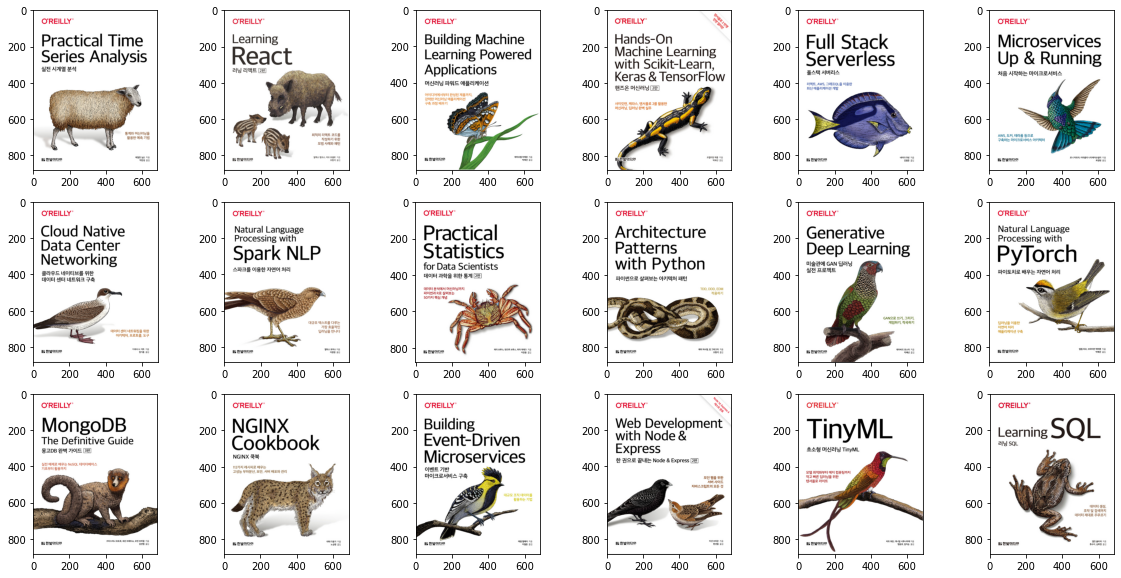

In [7]:
plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    pil_img = img.imread(img_path[i])
    plt.imshow(pil_img)
plt.show()

In [8]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

1번째 이미지



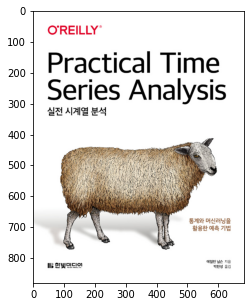

Texts:

"O'REILLY
Practical Time
Series Analysis
실전 시계열 분석
통계와 머신러닝을
활용한 예측 기법
에일린 닐슨 지음
HB 한빛미디의
박찬성 옮김
Harbit Medio, Ine
"

"O'REILLY"

"Practical"

"Time"

"Series"

"Analysis"

"실전"

"시계열"

"분석"

"통계"

"와"

"머신"

"러닝"

"을"

"활용"

"한"

"예측"

"기법"

"에일린"

"닐슨"

"지음"

"HB"

"한빛"

"미디"

"의"

"박찬성"

"옮김"

"Harbit"

"Medio,"

"Ine"
bounds: (148,828),(155,828),(155,831),(148,831)


In [9]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/drive/MyDrive/aiffel/ocr_python/my_google_api_key.json'

print(f'{1}번째 이미지\n')
plt.figure(figsize = (5, 5))
pil_img = img.imread(img_path[0])
plt.imshow(pil_img)
plt.show()
detect_text(img_path[0])

1번째 이미지



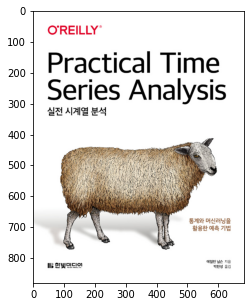

Texts:

"O'REILLY
Practical Time
Series Analysis
실전 시계열 분석
통계와 머신러닝을
활용한 예측 기법
에일린 닐슨 지음
HB 한빛미디의
박찬성 옮김
Harbit Medio, Ine
"

"O'REILLY"

"Practical"

"Time"

"Series"

"Analysis"

"실전"

"시계열"

"분석"

"통계"

"와"

"머신"

"러닝"

"을"

"활용"

"한"

"예측"

"기법"

"에일린"

"닐슨"

"지음"

"HB"

"한빛"

"미디"

"의"

"박찬성"

"옮김"

"Harbit"

"Medio,"

"Ine"
bounds: (148,828),(155,828),(155,831),(148,831)
2번째 이미지



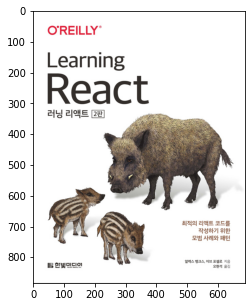

Texts:

"O'REILLY
Learning
React
러닝 리액트 [2)]
최적의 리액트 코드를
작성하기 위한
모범 사례와 패턴
1B 한빛민딘의
알렉스 뱅크스, 이브 포셀로 지음
오현석 옮김
Her Media, In
"

"O'REILLY"

"Learning"

"React"

"러닝"

"리"

"액트"

"["

"2"

")"

"]"

"최적"

"의"

"리"

"액트"

"코드"

"를"

"작성"

"하기"

"위한"

"모범"

"사례"

"와"

"패턴"

"1B"

"한빛"

"민딘"

"의"

"알렉스"

"뱅크스"

","

"이브"

"포셀"

"로"

"지음"

"오현석"

"옮김"

"Her"

"Media,"

"In"
bounds: (148,828),(157,828),(157,833),(148,833)
3번째 이미지



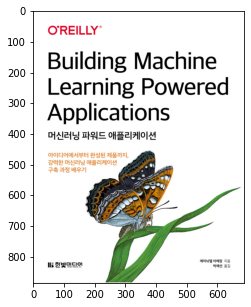

Texts:

"O'REILLY
Building Machine
Learning Powered
Applications
머신러닝 파워드 애플리케이션
아이디어에서부터 완성된 제품까지,
강력한 머신러닝 애플리케이션
구축 과정 배우기
HB 한빛민디의
에마뉘엘 아메장 지음
박해선 옮김
Hare Media, inc.
"

"O'REILLY"

"Building"

"Machine"

"Learning"

"Powered"

"Applications"

"머신"

"러닝"

"파워드"

"애플리케이션"

"아이디어"

"에서부터"

"완성"

"된"

"제품"

"까지"

","

"강력한"

"머신"

"러닝"

"애플리케이션"

"구축"

"과정"

"배우기"

"HB"

"한빛"

"민디"

"의"

"에마뉘엘"

"아메"

"장"

"지음"

"박해선"

"옮김"

"Hare"

"Media,"

"inc."
bounds: (149,830),(157,830),(157,833),(149,833)
4번째 이미지



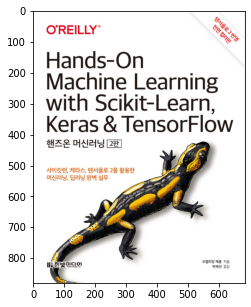

Texts:

"텐서플로 2 반영
O'REILLY
Hands-On
Machine Learning
with Scikit-Learn,
Keras & TensorFlow
핸즈온 머신러닝 2판]
사이킷런, 케라스, 텐서플로 2를 활용한
머신러닝, 딥러닝 완벽 실무
오렐리앙 제롱 지음
박해선 옮김
1B한빛민디이
Hanbit Media, ine
전면 컬러판
"

"텐서"

"플로"

"2"

"반영"

"O'REILLY"

"Hands-On"

"Machine"

"Learning"

"with"

"Scikit-Learn,"

"Keras"

"&"

"TensorFlow"

"핸즈"

"온"

"머신"

"러닝"

"2"

"판"

"]"

"사이"

"킷런"

","

"케"

"라스"

","

"텐서"

"플로"

"2"

"를"

"활용"

"한"

"머신"

"러닝"

","

"딥"

"러닝"

"완벽"

"실무"

"오렐리"

"앙"

"제롱"

"지음"

"박해선"

"옮김"

"1B"

"한빛"

"민"

"디이"

"Hanbit"

"Media,"

"ine"

"전면"

"컬러판"
bounds: (613,65),(643,95),(631,106),(602,76)
5번째 이미지



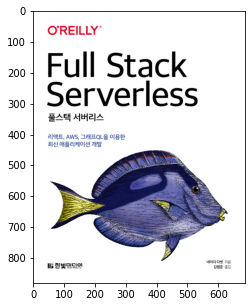

Texts:

"O'REILLY
Full Stack
Serverless
풀스택 서버리스
리액트, AWS, 그래프QL을 이용한
최신 애플리케이션 개발
IB 한빛미디의
네이더 다빗 지음
김범준 옮김
Har Medo, ne
"

"O'REILLY"

"Full"

"Stack"

"Serverless"

"풀"

"스택"

"서버"

"리스"

"리"

"액트"

","

"AWS"

","

"그래프"

"QL"

"을"

"이용한"

"최신"

"애플리케이션"

"개발"

"IB"

"한빛"

"미디"

"의"

"네이더"

"다빗"

"지음"

"김범준"

"옮김"

"Har"

"Medo,"

"ne"
bounds: (148,830),(155,830),(155,833),(148,833)
6번째 이미지



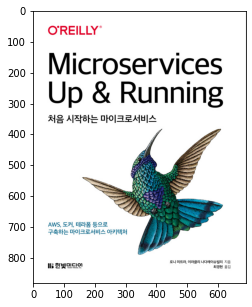

Texts:

"O'REILLY
Microservices
Up & Running
처음 시작하는 마이크로서비스
AWS, 도커, 테라폼 등으로
구축하는 마이크로서비스 아키텍처
1B 한빛민딘의
로니 미트라, 이라클리 나다레이슈빌리 지음
최경현 옮김
Hanoit Meda, ne
"

"O'REILLY"

"Microservices"

"Up"

"&"

"Running"

"처음"

"시작"

"하는"

"마이크로"

"서비스"

"AWS"

","

"도커"

","

"테라"

"폼"

"등"

"으로"

"구축"

"하는"

"마이크로"

"서비스"

"아키텍처"

"1B"

"한빛"

"민딘"

"의"

"로니"

"미트라"

","

"이라"

"클리"

"나"

"다레"

"이슈"

"빌리"

"지음"

"최경현"

"옮김"

"Hanoit"

"Meda,"

"ne"
bounds: (149,829),(155,829),(155,834),(149,834)
7번째 이미지



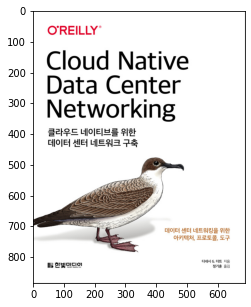

Texts:

"O'REILLY
Cloud Native
Data Center
Networking
클라우드 네이티브를 위한
데이터 센터 네트워크 구축
데이터 센터 네트워킹을 위한
아키텍처, 프로토콜, 도구
디네시 G. 더트 지음
정기훈 옮김
Hanoit Media, Ine.
"

"O'REILLY"

"Cloud"

"Native"

"Data"

"Center"

"Networking"

"클라우드"

"네이티브"

"를"

"위한"

"데이터"

"센터"

"네트워크"

"구축"

"데이터"

"센터"

"네트워킹"

"을"

"위한"

"아키텍처"

","

"프로토콜"

","

"도구"

"디"

"네시"

"G."

"더트"

"지음"

"정기훈"

"옮김"

"Hanoit"

"Media,"

"Ine."
bounds: (147,828),(158,828),(158,833),(147,833)
8번째 이미지



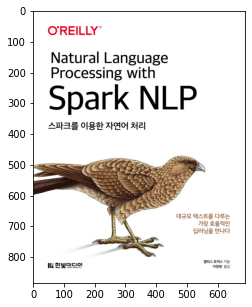

Texts:

"O'REILLY
Natural Language
Processing with
Spark NLP
스파크를 이용한 자연어 처리
대규모 텍스트를 다루는
가장 효율적인
딥러닝을 만나다
1B 한빛민딘의
앨릭스 토머스 지음
이창현 옮김
Hanoit Media, Inc.
"

"O'REILLY"

"Natural"

"Language"

"Processing"

"with"

"Spark"

"NLP"

"스파크"

"를"

"이용한"

"자연어"

"처리"

"대규모"

"텍스트"

"를"

"다루는"

"가장"

"효율적인"

"딥"

"러닝"

"을"

"만나다"

"1B"

"한빛"

"민딘"

"의"

"앨릭스"

"토머스"

"지음"

"이창현"

"옮김"

"Hanoit"

"Media,"

"Inc."
bounds: (148,829),(159,829),(159,834),(148,834)
9번째 이미지



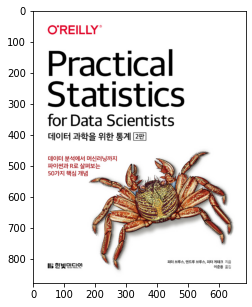

Texts:

"O'REILLY
Practical
Statistics
for Data Scientists
데이터 과학을 위한 통계 [2판]
데이터 분석에서 머신러 닝까지
파이썬과 R로 살펴보는
50가지 핵심 개념
1B 한빛미디이
피터 브루스, 앤드루 브루스, 피터 게데크 지음
이준용 옮김
"

"O'REILLY"

"Practical"

"Statistics"

"for"

"Data"

"Scientists"

"데이터"

"과학"

"을"

"위한"

"통계"

"["

"2"

"판"

"]"

"데이터"

"분석"

"에서"

"머신"

"러"

"닝"

"까지"

"파이썬"

"과"

"R"

"로"

"살펴"

"보는"

"50"

"가지"

"핵심"

"개념"

"1B"

"한빛"

"미디이"

"피터"

"브루스"

","

"앤드루"

"브루스"

","

"피터"

"게"

"데크"

"지음"

"이준용"

"옮김"
bounds: (620,821),(637,821),(637,832),(620,832)
10번째 이미지



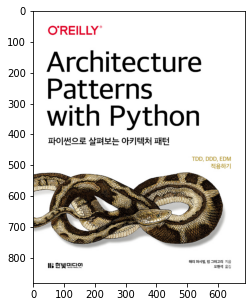

Texts:

"O'REILLY
Architecture
Patterns
with Python
파이썬으로 살펴보는 아키텍처 패턴
TDD, DDD, EDM
적용하기
1B 한빛민디이
해리 퍼시벌, 밥 그레고리 지음
오현석 옮김
Har Medo, ne
"

"O'REILLY"

"Architecture"

"Patterns"

"with"

"Python"

"파이썬"

"으로"

"살펴"

"보는"

"아키텍처"

"패턴"

"TDD,"

"DDD,"

"EDM"

"적용"

"하기"

"1B"

"한빛"

"민"

"디이"

"해리"

"퍼시벌"

","

"밥"

"그레고리"

"지음"

"오현석"

"옮김"

"Har"

"Medo,"

"ne"
bounds: (149,830),(155,830),(155,833),(149,833)
11번째 이미지



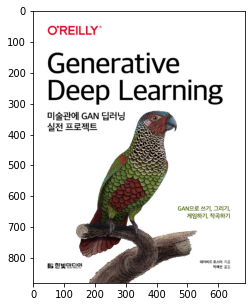

Texts:

"O'REILLY
Generative
Deep Learning
미술관에 GAN 딥러닝
실전 프로젝트
GAN으로 쓰기, 그리기,
게임하기, 작곡하기
IB 한빛미디의
데이비드포스터 지음
박해선 옮김
Har Medo, ine
"

"O'REILLY"

"Generative"

"Deep"

"Learning"

"미술관"

"에"

"GAN"

"딥"

"러닝"

"실전"

"프로젝트"

"GAN"

"으로"

"쓰기"

","

"그리기"

","

"게임"

"하기"

","

"작곡"

"하기"

"IB"

"한빛"

"미디"

"의"

"데이비드"

"포스터"

"지음"

"박해선"

"옮김"

"Har"

"Medo,"

"ine"
bounds: (148,830),(154,830),(154,833),(148,833)
12번째 이미지



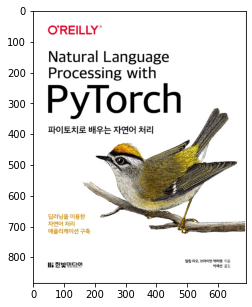

Texts:

"O'REILLY
Natural Language
Processing with
РУTorch
파이토치로 배우는 자연어 처리
딥러닝을 이용한
자연어 처리
애플리케이션 구축
B 힌빛민디이
델립 라오, 브라이언 맥머핸 지음
박해선 옮김
Harbet Medo, ne
"

"O'REILLY"

"Natural"

"Language"

"Processing"

"with"

"РУTorch"

"파이"

"토치로"

"배우는"

"자연어"

"처리"

"딥"

"러닝"

"을"

"이용한"

"자연어"

"처리"

"애플리케이션"

"구축"

"B"

"힌"

"빛민"

"디이"

"델립"

"라오"

","

"브라이언"

"맥"

"머핸"

"지음"

"박해선"

"옮김"

"Harbet"

"Medo,"

"ne"
bounds: (149,828),(156,828),(156,832),(149,832)
13번째 이미지



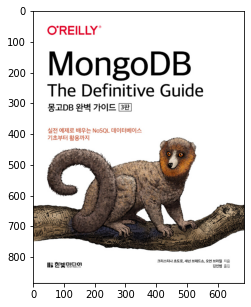

Texts:

"O'REILLY
MongoDB
The Definitive Guide
몽고DB 완벽 가이드 3판]
실전 예제로 배우는 NOSQL 데이터베이스
기초부터 활용까지
I13 한빛민딘이1
크리스티나 초도로, 섀넌 브래드쇼, 오언브라질 지음
김인범 옮김
Hart Medo, ne
"

"O'REILLY"

"MongoDB"

"The"

"Definitive"

"Guide"

"몽고"

"DB"

"완벽"

"가이드"

"3"

"판"

"]"

"실전"

"예제"

"로"

"배우는"

"NOSQL"

"데이터베이스"

"기초"

"부터"

"활용"

"까지"

"I13"

"한빛"

"민딘"

"이"

"1"

"크리스티나"

"초도"

"로"

","

"섀넌"

"브래드쇼"

","

"오언"

"브라질"

"지음"

"김인범"

"옮김"

"Hart"

"Medo,"

"ne"
bounds: (146,827),(157,827),(157,832),(146,832)
14번째 이미지



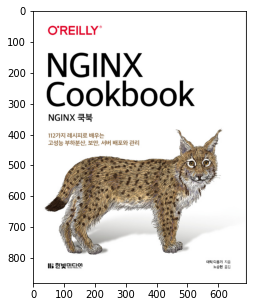

Texts:

"O'REILLY
NGINX
Cookbook
NGINX 쿡북
112가지 레시피로 배우는
고성능 부하분산, 보안, 서버 배포와 관리
1B 한빛민딘이
데릭 디용기 지음
노승현 옮김
Harbt Medo, ne
"

"O'REILLY"

"NGINX"

"Cookbook"

"NGINX"

"쿡북"

"112"

"가지"

"레시피"

"로"

"배우는"

"고성능"

"부하"

"분산"

","

"보안"

","

"서버"

"배포"

"와"

"관리"

"1B"

"한빛"

"민딘"

"이"

"데릭"

"디"

"용기"

"지음"

"노승현"

"옮김"

"Harbt"

"Medo,"

"ne"
bounds: (149,829),(155,829),(155,833),(149,833)
15번째 이미지



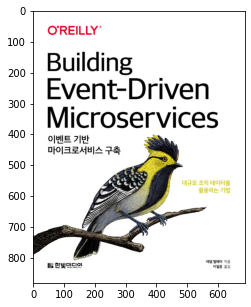

Texts:

"O'REILLY
Building
Event-Driven
Microservices
이벤트 기반
마이크로서비스 구축
대규모 조직 데이터를
활용하는 기법
I1B 한빛민디이
애덤 벨메어 지음
이일웅 옮김
Har Medo, ne
"

"O'REILLY"

"Building"

"Event-Driven"

"Microservices"

"이벤트"

"기반"

"마이크로"

"서비스"

"구축"

"대규모"

"조직"

"데이터"

"를"

"활용"

"하는"

"기법"

"I1B"

"한빛"

"민"

"디이"

"애덤"

"벨"

"메어"

"지음"

"이일웅"

"옮김"

"Har"

"Medo,"

"ne"
bounds: (148,829),(156,829),(156,833),(148,833)
16번째 이미지



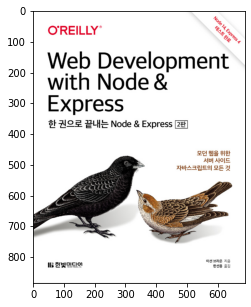

Texts:

"테스트 완료
O'REILLY
Web Development
with Node &
Express
한 권으로 끝내는 Node & Express [2판]
모던 웹을 위한
서버 사이드
자바스크립트의 모든 것
이선 브라운 지음
한선용 옮김
1B 한빛민디이
Har Medo, ine
Node 14, Express 4
"

"테스트"

"완료"

"O'REILLY"

"Web"

"Development"

"with"

"Node"

"&"

"Express"

"한"

"권"

"으로"

"끝내는"

"Node"

"&"

"Express"

"["

"2"

"판"

"]"

"모던"

"웹"

"을"

"위한"

"서버"

"사이드"

"자바"

"스크립트"

"의"

"모든"

"것"

"이선"

"브라운"

"지음"

"한선"

"용"

"옮김"

"1B"

"한빛"

"민"

"디이"

"Har"

"Medo,"

"ine"

"Node"

"14,"

"Express"

"4"
bounds: (669,93),(674,98),(667,105),(662,100)
17번째 이미지



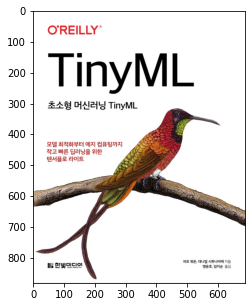

Texts:

"O'REILLY
TinyML
초소형 머신러닝 TinyML
모델 최적화부터 에지 컴퓨팅까지
작고 빠른 딥러닝을 위한
텐서플로 라이트
1B 한빛미디의
피트 워든, 대니얼 시투나야케 지음
맹윤호, 임지순 옮김
Hareit Meda, inc.
"

"O'REILLY"

"TinyML"

"초소형"

"머신"

"러닝"

"TinyML"

"모델"

"최적화"

"부터"

"에지"

"컴퓨팅"

"까지"

"작고"

"빠른"

"딥"

"러닝"

"을"

"위한"

"텐서"

"플로"

"라이트"

"1B"

"한빛"

"미디"

"의"

"피트"

"워든"

","

"대니얼"

"시투"

"나야"

"케"

"지음"

"맹윤호"

","

"임지순"

"옮김"

"Hareit"

"Meda,"

"inc."
bounds: (148,829),(156,829),(156,833),(148,833)
18번째 이미지



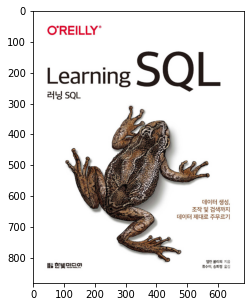

Texts:

"O'REILLY
Learning SQL
러닝 SQL
데이터 생성,
조작 및 검색까지
데이터 제대로 주무르기
HB 한빛민딘잇
앨런 볼리외 지음
류수미, 송희정 옮김
Har Mea, ne
"

"O'REILLY"

"Learning"

"SQL"

"러닝"

"SQL"

"데이터"

"생성"

","

"조작"

"및"

"검색"

"까지"

"데이터"

"제대로"

"주무르기"

"HB"

"한빛"

"민"

"딘잇"

"앨런"

"볼리"

"외"

"지음"

"류수미"

","

"송희정"

"옮김"

"Har"

"Mea,"

"ne"
bounds: (147,828),(156,828),(156,833),(147,833)


In [10]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/drive/MyDrive/aiffel/ocr_python/my_google_api_key.json'

for i in range(18):
    print(f'{i+1}번째 이미지\n')
    plt.figure(figsize = (5, 5))
    pil_img = img.imread(img_path[i])
    plt.imshow(pil_img)
    plt.show()
    detect_text(img_path[i])

In [11]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
images = [ keras_ocr.tools.read(path) for path in img_path]
prediction_groups = [pipeline.recognize([path]) for path in img_path]

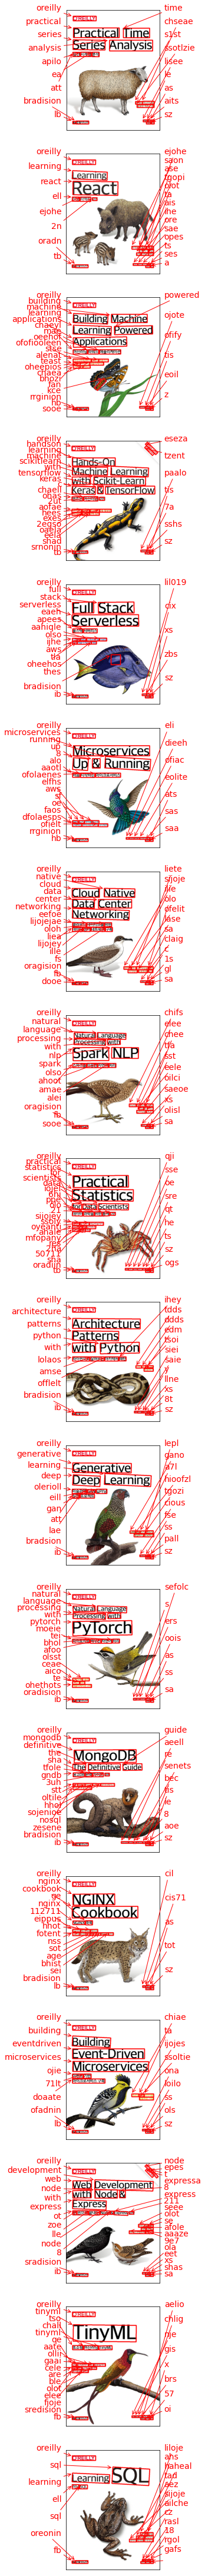

In [16]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [13]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,519 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [14]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=0999af728eb836a85c93276362a0c90fa02f5093019b1c04b6cfdbdad03f1a46
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
